Context

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective. 

How can I help here?

My analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(r'C:\Users\SHREYAS\Downloads\Jamboree_Admission.csv')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)


Now, let us drop the irrelevant column and check if there are any null values in the dataset


In [6]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Lets see the distribution of the variables of graduate applicants.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

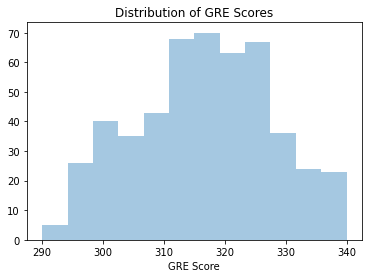

In [8]:
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

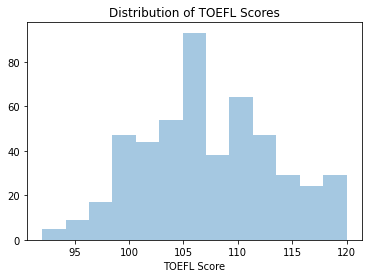

In [9]:
fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

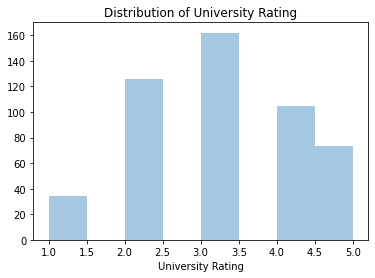

In [10]:
fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

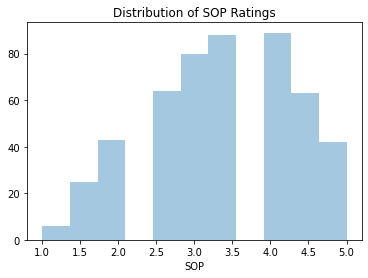

In [11]:
fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

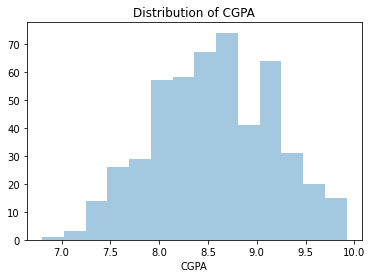

In [12]:
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

In [13]:
plt.show()


It is clear from the distributions, students with varied merit apply for the university.
Understanding the relation between different factors responsible for graduate admissions

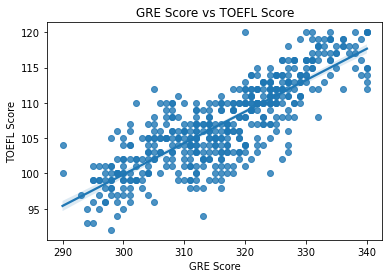

In [14]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)
plt.title("GRE Score vs TOEFL Score")
plt.show()


People with higher GRE Scores also have higher TOEFL Scores which is justified because both
TOEFL and GRE have a verbal section which although not similar are relatable.

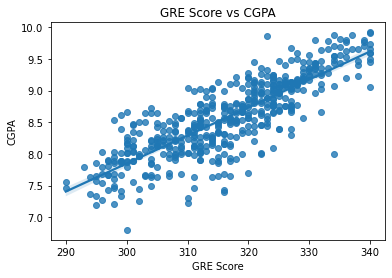

In [15]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe
because they are smart or hard working

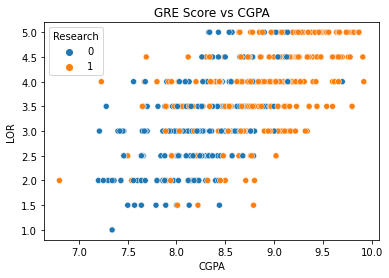

In [16]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that
persons academic excellence. Having research experience is usually related with a good LOR  
which might be justified by the fact that supervisors have personal interaction with the students
performing research which usually results in good LORs

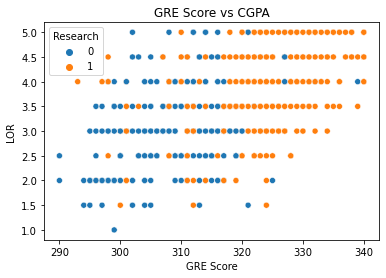

In [17]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=df, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

GRE scores and lor are not that related to each other and people with different kind of lors have all kinds of GRE scores.

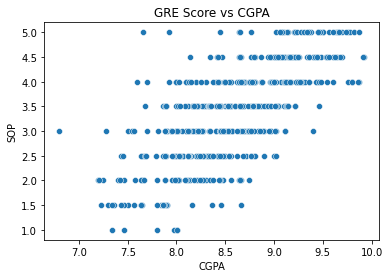

In [19]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic
performance, but since people with good CGPA tend to be more hard working so they have good
things to say in their SOP which might explain the slight move towards higher CGPA as along
with good SOPs

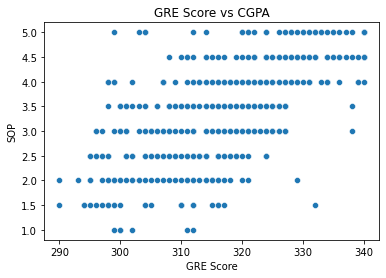

In [20]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

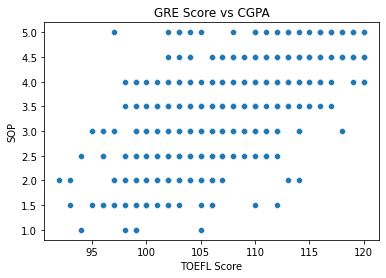

In [21]:
fig = sns.scatterplot(x="TOEFL Score", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()


Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP
is not always related to the applicants English skills.


Correlation among variables

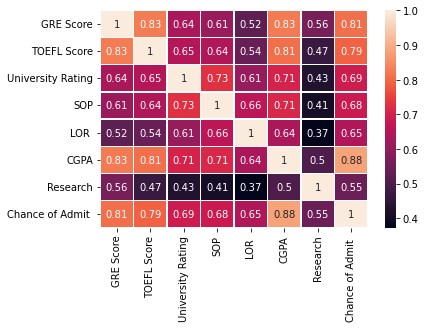

In [22]:
import numpy as np
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()


Lets split the dataset with training and testing set and prepare the inputs and outputs

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=True)

In [25]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
25,340,120,5,4.5,4.5,9.60,1
495,332,108,5,4.5,4.0,9.02,1
306,323,110,3,4.0,3.5,9.10,1
132,309,105,5,3.5,3.5,8.56,0
295,317,100,2,3.0,2.5,8.57,0
...,...,...,...,...,...,...,...
120,335,117,5,5.0,5.0,9.56,1
439,312,105,2,1.5,3.0,8.46,0
471,311,103,3,2.0,4.0,8.09,0
414,321,110,4,3.5,4.0,8.35,1


In [26]:
y_train

25     0.94
495    0.87
306    0.79
132    0.71
295    0.68
       ... 
120    0.94
439    0.66
471    0.64
414    0.72
41     0.49
Name: Chance of Admit , Length: 400, dtype: float64

STANDARDIZATION

In [27]:
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)

In [28]:
X_train_std

array([[ 2.0331599 ,  2.10721225,  1.6354664 , ...,  1.12396279,
         1.70375848,  0.87299172],
       [ 1.33880433,  0.12200738,  1.6354664 , ...,  0.57635607,
         0.742073  ,  0.87299172],
       [ 0.55765432,  0.45287486, -0.10903109, ...,  0.02874935,
         0.87471927,  0.87299172],
       ...,
       [-0.48387904, -0.70516131, -0.10903109, ...,  0.57635607,
        -0.79993993, -1.14548624],
       [ 0.38406542,  0.45287486,  0.76321765, ...,  0.57635607,
        -0.36883954,  0.87299172],
       [-0.04990681, -0.37429383, -0.98127984, ..., -1.06646408,
        -0.61755131,  0.87299172]])

In [29]:
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [30]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,2.033160,2.107212,1.635466,1.152162,1.123963,1.703758,0.872992
1,1.338804,0.122007,1.635466,1.152162,0.576356,0.742073,0.872992
2,0.557654,0.452875,-0.109031,0.651222,0.028749,0.874719,0.872992
3,-0.657468,-0.374294,1.635466,0.150282,0.028749,-0.020643,-1.145486
4,0.036888,-1.201463,-0.981280,-0.350658,-1.066464,-0.004062,-1.145486
...,...,...,...,...,...,...,...
395,1.599188,1.610911,1.635466,1.653102,1.671570,1.637435,0.872992
396,-0.397085,-0.374294,-0.981280,-1.853479,-0.518857,-0.186451,-1.145486
397,-0.483879,-0.705161,-0.109031,-1.352538,0.576356,-0.799940,-1.145486
398,0.384065,0.452875,0.763218,0.150282,0.576356,-0.368840,0.872992


Lets use a bunch of different algorithms to see which model performs better

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
models = [
['Linear Regression :', LinearRegression()],
['Lasso Regression :', Lasso(alpha=0.1)], 
['Ridge Regression :', Ridge(alpha=1.0)] 
]

In [35]:
for name,model in models:
    model.fit(X_train, y_train.values)
    predictions = model.predict(std.transform(X_test))
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Linear Regression : 0.06108763911945955
Lasso Regression : 0.12012030555850323
Ridge Regression : 0.061095644902991665



Linear Regression using Statsmodel library
    1)Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where
    a higher value generally indicates a better fit, assuming certain conditions are met
    2) const coefficients is your Y-intercept. It means that if both the Interest_Rate and
       Unemployment_Rate coefiicients are zero, then the expected output (i.e., the Y) would be
       equal to the const coefficients
    3) interest_Rate coefficients represents the change in the output Y due to a change of one unit
in the interest rate (everything else held constant)
    4) Unemployment_Rate coefficients represents the change in the output Y due to a change of
one unit in the unemployment rate (everything else held constant)
    5) std err reflects the level of accuracy of the coefficinets
    6) P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant.



In [37]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train.values, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     262.2
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          1.33e-143
Time:                        17:42:46   Log-Likelihood:                 563.67
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     392   BIC:                            -1079.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7216      0.00

In [38]:
X_train_new=X_train.drop(columns='SOP')

In [40]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     306.5
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          8.12e-145
Time:                        17:45:32   Log-Likelihood:                 563.56
No. Observations:                 400   AIC:                            -1113.
Df Residuals:                     393   BIC:                            -1085.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7216      0.00

VIF

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataset,col):
    dataset=dataset.drop(columns=col,axis=1)
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [50]:
calculate_vif(X_train_new,[])

,features,VIF_Value
0,const,1.000000
1,GRE Score,4.552388
2,TOEFL Score,3.910374
3,University Rating,2.209599
4,LOR,1.874676
5,CGPA,4.529508
6,Research,1.450459



VIF looks fine so we can go ahead with the predictions

In [51]:
X_test_std= std.transform(X_test)

In [52]:
X_test=pd.DataFrame(X_test_std, columns=X_train_columns)

In [53]:
X_test = sm.add_constant(X_test)

In [54]:
X_test_del=list(set(X_test.columns).difference(set(X_train_new.columns)))

In [55]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [56]:
X_test_new=X_test.drop(columns=X_test_del)

In [57]:
pred = model1.predict(X_test_new)

In [58]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [59]:

print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))

Mean Absolute Error  0.04360455787456564
Root Mean Square Error  0.061051205012112676


Mean of Residuals

In [60]:
residuals = y_test.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.0009174045021298516


Test for Homoscedasticity

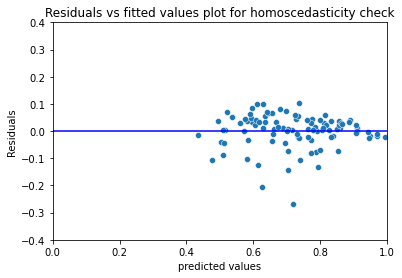

In [61]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [62]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)

[('F statistic', 1.689521736534876), ('p-value', 0.046494462633431106)]

Here null hypothesis is - error terms are homoscedastic and since p-values >0.05

Normality of residuals

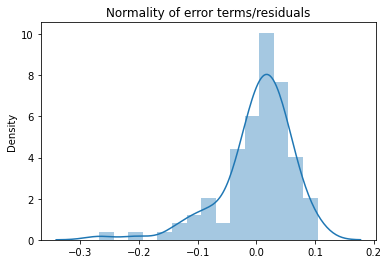

In [63]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

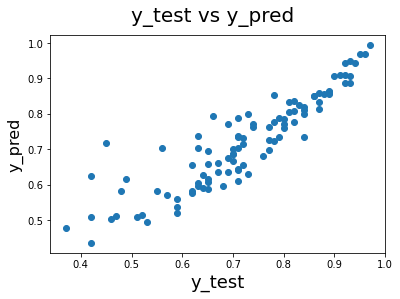

In [64]:
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20) # Plot heading
plt.xlabel('y_test', fontsize=18) # X-label
plt.ylabel('y_pred', fontsize=16) 